## Tilting Point Data Test (Part 2)
- You are free to use any package that you deem necessary, the basic pacakge is already imported
- After each question, there will be an answer area, you can add as many cells as you deem necessary between answer and following question
- The accuracy is less important, the path to get there is what's important

In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

### Question: Data Analysis and Machine Learning

Attached is a Game of War type game, given the data, please build a model to predict players' LTV
1. What kind of exploratory analysis would you want to conduct?
2. What procedure would you take to build the model?
3. How would you validate the result?
4. Please choose one model, and perform from step 1 to step 3 in order
5. How would you productionalize it?

In [2]:
df = pd.read_csv(os.path.join('data', 'ltv_data.csv'))
df.head()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
0,213.0,40234.0,4.0,8.0,1877045.0,0.0,NaN,NaN,NaN,NaN,49.5,NaN,NaN,120.0
1,26.0,10384.0,3.0,5.0,292869.0,0.0,NaN,NaN,NaN,NaN,577.5,NaN,NaN,15.0
2,1.0,176.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN
3,2.0,181.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN
4,1.0,135.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,67.5,NaN,NaN,NaN


##### Answer below

### 1. What kind of exploratory analysis would you want to conduct?

I would like to conduct CRISP-DM approach for exploratory analysis of given data.

The CRISP-DM Process (Cross Industry Process for Data Mining). It mainly consists of the following parts:

* Business Understanding
* Data Understanding
* Data Preparation
* Data Modeling
* Evaluation
* Deployment


### Business Understading

It looks pretty obvious that we want to be able to predict our users LTV by some available data from game play, and to be confident in the prediction for better decision making. 

### Data Understanding

Let's have a look at given data. All its columns are numerical. We don't have any categorical data. It means that all our possible factors are quantitative.

In [3]:
df.describe()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
count,194092.000000,194092.000000,194092.000000,194092.000000,1.940920e+05,194092.000000,185056.000000,185056.000000,185056.000000,185056.000000,1.048575e+06,2517.000000,2882.000000,3196.000000
mean,5.635482,5494.401794,1.299070,1.488438,1.896333e+06,125.341276,0.478914,2.072729,0.493559,18.432923,9.151752e+01,29.075089,49.454545,128.054443
std,17.374128,24499.362161,0.853919,2.284216,1.853906e+07,946.886849,8.831115,27.111509,8.907912,98.584136,8.588002e+02,69.339642,144.926618,532.415173
min,1.000000,0.000000,-7.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,127.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000,5.000000,5.000000
50%,1.000000,454.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,10.000000,10.000000,13.000000
75%,3.000000,1832.000000,1.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,20.000000,35.000000,53.000000
max,519.000000,585638.000000,10.000000,21.000000,1.011674e+09,77216.000000,2005.000000,3883.000000,1810.000000,3492.000000,1.786410e+05,1120.000000,3465.000000,12460.000000


**1.** Let's explore data shape

In [5]:
df.shape

(1048575, 14)

**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [7]:
no_nulls = set(df.dropna(axis='columns').columns.tolist())
print(no_nulls)

{'first_session_length'}


**3.** Which columns have the most missing values?  Provide a set of column names that have more than 75% if their values missing.

In [8]:
missing_df = df.isnull().sum(axis=0) / len(df)
missing_df[missing_df > 0.75].index.tolist()

['sessions',
 'session_length',
 'vip_level',
 'core_level',
 'alliance_power',
 'alliance_territory',
 'realm_chat_sent',
 'alliance_chat_sent',
 'message_sent',
 'help_sent',
 'day7_rev',
 'day30_rev',
 'ltv']

In [9]:
df['vip_level'].unique()

array([ 4.,  3.,  1.,  5.,  2.,  0.,  6.,  8.,  7., 10.,  9., -1., -2.,
       -6., -3., -4., -7., nan])

In [10]:
df['core_level'].unique()

array([ 8.,  5.,  0.,  2.,  3.,  7.,  9.,  4.,  6.,  1., 10., 13., 11.,
       15., 12., 17., 20., 14., 16., 19., 18., 21., nan])

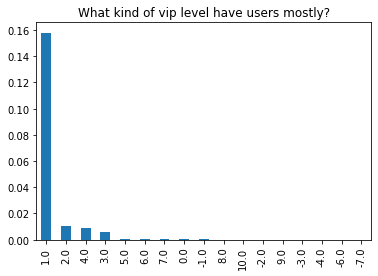

In [14]:
vip_levels = df['vip_level'].value_counts()

(vip_levels/df.shape[0]).plot(kind="bar");
plt.title("What kind of vip level have users mostly?");

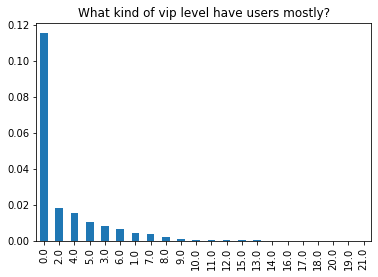

In [15]:
core_levels = df['core_level'].value_counts()

(core_levels/df.shape[0]).plot(kind="bar");
plt.title("What kind of vip level have users mostly?");

### Data Preparation

**4.** Mainly, we might answer the question, what columns relate to LTV?

For that purpose let's calculate the Correlation Matrix

In [22]:
corr = df.corr()

corr

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
sessions,1.000000,0.462079,0.696820,0.596918,0.178371,0.194613,0.151918,0.283819,0.184747,0.670853,0.107008,0.174979,0.191120,0.130137
session_length,0.462079,1.000000,0.564609,0.514611,0.226155,0.239161,0.198586,0.402452,0.290373,0.626687,0.533392,0.329017,0.318844,0.235058
vip_level,0.696820,0.564609,1.000000,0.761122,0.233500,0.261907,0.145848,0.270525,0.188361,0.581809,0.236214,0.406434,0.326071,0.153944
core_level,0.596918,0.514611,0.761122,1.000000,0.240010,0.280903,0.132226,0.231235,0.164745,0.492759,0.274564,0.602614,0.513149,0.263297
alliance_power,0.178371,0.226155,0.233500,0.240010,1.000000,0.807418,0.062801,0.105967,0.116923,0.163294,0.109441,0.067503,0.047056,0.001815
alliance_territory,0.194613,0.239161,0.261907,0.280903,0.807418,1.000000,0.057140,0.092342,0.105172,0.163495,0.125850,0.006130,0.003718,-0.009173
realm_chat_sent,0.151918,0.198586,0.145848,0.132226,0.062801,0.057140,1.000000,0.510650,0.390203,0.228366,0.072122,0.220268,0.099173,0.048367
alliance_chat_sent,0.283819,0.402452,0.270525,0.231235,0.105967,0.092342,0.510650,1.000000,0.625398,0.507552,0.142020,0.314153,0.224355,0.128599
message_sent,0.184747,0.290373,0.188361,0.164745,0.116923,0.105172,0.390203,0.625398,1.000000,0.317437,0.114102,0.302985,0.242454,0.124317
help_sent,0.670853,0.626687,0.581809,0.492759,0.163294,0.163495,0.228366,0.507552,0.317437,1.000000,0.216427,0.265551,0.241833,0.138385


And plot a heatmap of that matrix

<AxesSubplot:>

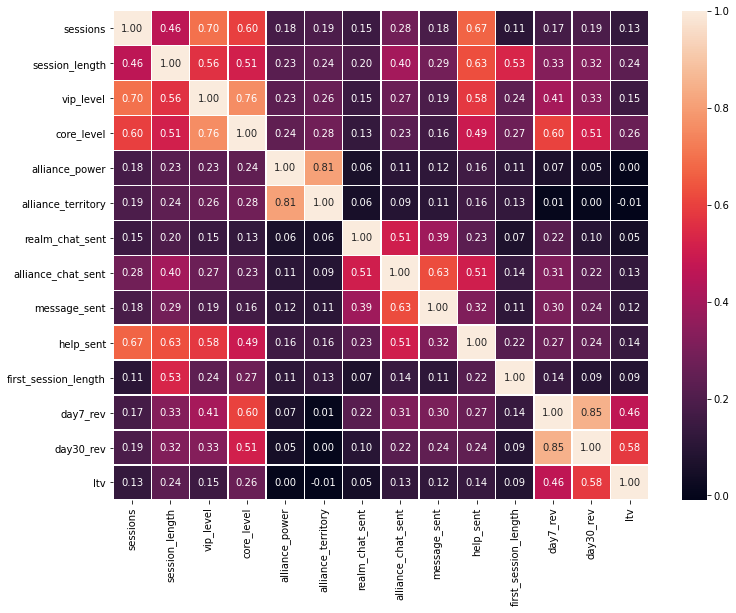

In [38]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
    corr, 
    xticklabels=corr.columns, 
    yticklabels=corr.columns, 
    annot=True, 
    fmt='.2f', 
    linewidths=.5, 
    ax=ax
)

As we can see from the Correlation Matrix, the most relevant for LTV are `day7_rev` and `day30_rev`, as it was expected. Aslo `session_length` as well as `core_level` has a weak linear influence on LTV. Other factors are negligable.

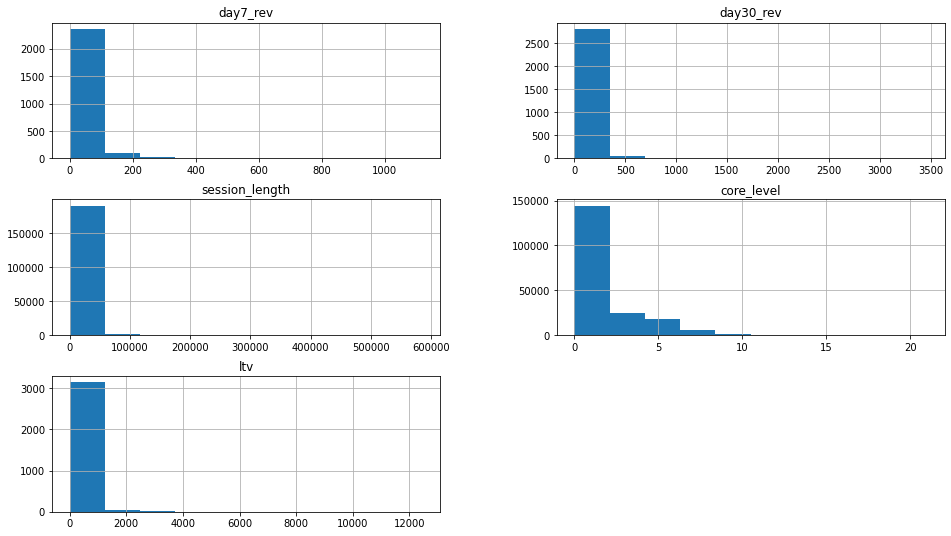

In [66]:
df[['day7_rev', 'day30_rev', 'session_length', 'core_level', 'ltv']].hist(figsize=(16, 9));

### Supervised ML Process

* Instantiate Model
* Fit Model
* Predict on test set
* Score Model using Metric

### Working with Missing Values

* Remove
* Impute
* Work Around

**1.** What proportion of data is reported LTV?

In [69]:
df.ltv.notna()

0           True
1           True
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: ltv, Length: 1048575, dtype: bool

In [68]:
prop_ltv = df.ltv.notna().mean()

prop_ltv

0.003047946021982214

**2.** Remove the rows with missing LTV values from dataset

In [70]:
ltv_rm = df.dropna(subset=['ltv'], axis=0)

ltv_rm

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
0,213.0,40234.0,4.0,8.0,1877045.0,0.0,NaN,NaN,NaN,NaN,49.5,NaN,NaN,120.0
1,26.0,10384.0,3.0,5.0,292869.0,0.0,NaN,NaN,NaN,NaN,577.5,NaN,NaN,15.0
14,206.0,98897.0,4.0,9.0,1585741.0,0.0,NaN,NaN,NaN,NaN,77.0,5.0,20.0,55.0
18,51.0,19270.0,4.0,6.0,313721.0,0.0,NaN,NaN,NaN,NaN,797.5,NaN,NaN,21.0
20,33.0,5742.0,3.0,6.0,1757873.0,0.0,NaN,NaN,NaN,NaN,68.5,5.0,5.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193541,17.0,6825.0,2.0,5.0,685969.0,152.0,0.0,0.0,0.0,0.0,386.5,3.0,3.0,3.0
193617,2.0,1940.0,2.0,4.0,308514.0,130.0,0.0,1.0,0.0,0.0,877.0,10.0,10.0,10.0
193694,6.0,11104.0,3.0,8.0,6115474.0,481.0,1.0,1.0,2.0,23.0,1923.0,10.0,10.0,10.0
193800,1.0,6405.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3202.5,10.0,10.0,10.0


In [72]:
df.ltv.describe()

count     3196.000000
mean       128.054443
std        532.415173
min          0.000000
25%          5.000000
50%         13.000000
75%         53.000000
max      12460.000000
Name: ltv, dtype: float64

In [73]:
all_rm = df.dropna(axis=0)

all_rm

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
8652,67.0,30974.0,3.0,7.0,449748.0,0.0,0.0,2.0,0.0,0.0,111.5,5.0,5.0,5.0
8721,3.0,2452.0,1.0,4.0,14692116.0,0.0,0.0,0.0,0.0,0.0,1052.5,5.0,5.0,5.0
8773,35.0,27908.0,5.0,8.0,520663.0,0.0,0.0,0.0,0.0,3.0,1693.0,10.0,20.0,20.0
8843,64.0,44846.0,4.0,7.0,554966.0,0.0,0.0,3.0,0.0,8.0,166.5,25.0,55.0,1335.0
8856,67.0,22212.0,4.0,8.0,10936447.0,0.0,0.0,1.0,0.0,104.0,820.5,5.0,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193541,17.0,6825.0,2.0,5.0,685969.0,152.0,0.0,0.0,0.0,0.0,386.5,3.0,3.0,3.0
193617,2.0,1940.0,2.0,4.0,308514.0,130.0,0.0,1.0,0.0,0.0,877.0,10.0,10.0,10.0
193694,6.0,11104.0,3.0,8.0,6115474.0,481.0,1.0,1.0,2.0,23.0,1923.0,10.0,10.0,10.0
193800,1.0,6405.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3202.5,10.0,10.0,10.0


In [135]:
all_rm.corr()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
sessions,1.000000,0.599433,0.428514,0.520667,0.113621,0.091275,0.162186,0.362977,0.250874,0.680143,0.004213,0.177369,0.207364,0.146900
session_length,0.599433,1.000000,0.426603,0.587227,0.152171,0.108000,0.255375,0.546996,0.426606,0.737835,0.279159,0.330909,0.345908,0.257500
vip_level,0.428514,0.426603,1.000000,0.674184,0.119638,0.085995,0.157736,0.279297,0.233669,0.429263,0.158409,0.405639,0.328350,0.163930
core_level,0.520667,0.587227,0.674184,1.000000,0.171544,0.116245,0.232387,0.386298,0.349331,0.527520,0.179348,0.602361,0.527913,0.295195
alliance_power,0.113621,0.152171,0.119638,0.171544,1.000000,0.846391,0.043997,0.065609,0.122414,0.047015,0.092272,0.067998,0.054486,0.008677
alliance_territory,0.091275,0.108000,0.085995,0.116245,0.846391,1.000000,0.015133,0.023115,0.066370,0.014072,0.056639,0.005870,0.006145,-0.006590
realm_chat_sent,0.162186,0.255375,0.157736,0.232387,0.043997,0.015133,1.000000,0.528177,0.585259,0.211402,0.053193,0.220268,0.168406,0.091169
alliance_chat_sent,0.362977,0.546996,0.279297,0.386298,0.065609,0.023115,0.528177,1.000000,0.642454,0.573439,0.139461,0.314153,0.288556,0.179758
message_sent,0.250874,0.426606,0.233669,0.349331,0.122414,0.066370,0.585259,0.642454,1.000000,0.379936,0.084775,0.302985,0.278907,0.155628
help_sent,0.680143,0.737835,0.429263,0.527520,0.047015,0.014072,0.211402,0.573439,0.379936,1.000000,0.151531,0.265551,0.257858,0.154804


That's rather poor result. Let's consider some approaches to improve that.

About the Coefficient of Determination or [R2 Score](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [131]:
def test_linear_model(data_frame, features):
    X = data_frame[features] # create X using explanatory variables
    y = data_frame.ltv

    # split data into training and test data, and fit a linear model
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
    lm_model = LinearRegression(normalize=True)

    lm_model.fit(X_train, y_train)

    y_test_preds = lm_model.predict(X_test) # predictions using X and lm_model
    rsquared_score =  r2_score(y_test, y_test_preds) # rsquared for comparing test and preds from lm_model
    length_y_test = len(y_test) # num in y_test
    mse = mean_squared_error(y_test, y_test_preds)
    
    print("The r-squared score for the model was {} on {} values.".format(rsquared_score, length_y_test))


In [105]:
test_linear_model(all_rm, list(all_rm.columns)[:-1])
test_linear_model(all_rm, ['day7_rev', 'day30_rev', 'session_length', 'core_level'])

The r-squared score for the model was 0.2581861486815522 on 731 values.
The r-squared score for the model was 0.2617475150764016 on 731 values.


### Common Imputation Methods

* Mean
* Median
* Mode
* Predict using other columns and a supervised model
* Find similar rows and fill with their values (k-NN approach)

By imputing, we are diluting the impotrance of that feature. Variability in features is what allows us to use them to predict another variable well.

In [90]:
drop_ltv_df = df.dropna(subset=['ltv']) # drop the rows with missing ltv

# test look
drop_ltv_df.head()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
0,213.0,40234.0,4.0,8.0,1877045.0,0.0,NaN,NaN,NaN,NaN,49.5,NaN,NaN,120.0
1,26.0,10384.0,3.0,5.0,292869.0,0.0,NaN,NaN,NaN,NaN,577.5,NaN,NaN,15.0
14,206.0,98897.0,4.0,9.0,1585741.0,0.0,NaN,NaN,NaN,NaN,77.0,5.0,20.0,55.0
18,51.0,19270.0,4.0,6.0,313721.0,0.0,NaN,NaN,NaN,NaN,797.5,NaN,NaN,21.0
20,33.0,5742.0,3.0,6.0,1757873.0,0.0,NaN,NaN,NaN,NaN,68.5,5.0,5.0,70.0


In [133]:
fill_df = drop_ltv_df.fillna(drop_ltv_df.mean()) # fill all missing values with the mean of the column.

# test look
fill_df.head()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
0,213.0,40234.0,4.0,8.0,1877045.0,0.0,6.536049,35.445845,7.010023,259.606531,49.5,29.075089,49.454545,120.0
1,26.0,10384.0,3.0,5.0,292869.0,0.0,6.536049,35.445845,7.010023,259.606531,577.5,29.075089,49.454545,15.0
14,206.0,98897.0,4.0,9.0,1585741.0,0.0,6.536049,35.445845,7.010023,259.606531,77.0,5.000000,20.000000,55.0
18,51.0,19270.0,4.0,6.0,313721.0,0.0,6.536049,35.445845,7.010023,259.606531,797.5,29.075089,49.454545,21.0
20,33.0,5742.0,3.0,6.0,1757873.0,0.0,6.536049,35.445845,7.010023,259.606531,68.5,5.000000,5.000000,70.0


In [136]:
fill_df.corr()

,sessions,session_length,vip_level,core_level,alliance_power,alliance_territory,realm_chat_sent,alliance_chat_sent,message_sent,help_sent,first_session_length,day7_rev,day30_rev,ltv
sessions,1.000000,0.582352,0.418752,0.521299,0.099028,0.080553,0.130968,0.300422,0.230371,0.638839,0.010220,0.155225,0.180987,0.130137
session_length,0.582352,1.000000,0.408062,0.573094,0.163396,0.124798,0.217556,0.472322,0.395545,0.711733,0.302736,0.292981,0.304281,0.235058
vip_level,0.418752,0.408062,1.000000,0.693159,0.114157,0.086979,0.098723,0.223611,0.208857,0.411763,0.159038,0.378394,0.315914,0.153944
core_level,0.521299,0.573094,0.693159,1.000000,0.173958,0.129955,0.150664,0.313275,0.308864,0.512504,0.192117,0.545110,0.488406,0.263297
alliance_power,0.099028,0.163396,0.114157,0.173958,1.000000,0.825221,0.022362,0.048779,0.117353,0.035848,0.086321,0.059223,0.045485,0.001815
alliance_territory,0.080553,0.124798,0.086979,0.129955,0.825221,1.000000,0.010829,0.020187,0.079151,0.012400,0.071838,0.005589,0.003597,-0.009173
realm_chat_sent,0.130968,0.217556,0.098723,0.150664,0.022362,0.010829,1.000000,0.706332,0.617288,0.256878,0.026828,0.133005,0.097541,0.047627
alliance_chat_sent,0.300422,0.472322,0.223611,0.313275,0.048779,0.020187,0.706332,1.000000,0.698240,0.546230,0.102465,0.238478,0.217246,0.126632
message_sent,0.230371,0.395545,0.208857,0.308864,0.117353,0.079151,0.617288,0.698240,1.000000,0.391534,0.072901,0.259471,0.237028,0.122416
help_sent,0.638839,0.711733,0.411763,0.512504,0.035848,0.012400,0.256878,0.546230,0.391534,1.000000,0.152367,0.233605,0.229128,0.136269


In [115]:
fill_df.to_csv('data/ltv_data_fill.csv', index=False)

Now we managed to improve the quality of the model by mean imputation method for missing values in the dataset.

In [134]:
test_linear_model(all_rm, list(all_rm.columns)[:-1])
test_linear_model(fill_df, list(fill_df.columns)[:-1])
test_linear_model(fill_df, ['day7_rev', 'day30_rev', 'session_length', 'core_level'])

The r-squared score for the model was 0.25974216489520396 on 487 values.
305737.6434352728
The r-squared score for the model was 0.29444837665559287 on 640 values.
288308.99143719854
The r-squared score for the model was 0.2987708775360647 on 640 values.
286542.6913847261
